# Libraries


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import pickle

In [131]:
train_file_path = 'train_ctrUa4K.csv'
test_file_path = 'test_lAUu6dG.csv'

In [132]:
df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)


In [133]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [134]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [136]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [137]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [138]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Preprocessing

In [139]:
df_train.duplicated().sum()

0

In [140]:
df_train.duplicated().sum()

0

In [141]:
# missing values in train data
df_train.isnull().sum()

# LoanAmount missing-> remove row. ( percentage of missing data is 5.2)
# Loan_Amount_Term missing-> remove row. ( percentage of missing data is 3.58)
# Credit_History missing -> remove row. ( percentage of missing data is 8.15)
# we need to recheck the other missing values after we handle these 3 critical information.
#

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [142]:
label_enc= LabelEncoder()
df_train['Dependents'] = label_enc.fit_transform(df_train['Dependents'])

In [143]:
df_train.dropna(subset=['LoanAmount','Loan_Amount_Term','Credit_History'],inplace=True)
#df_train.dropna(inplace= True)
df_train.isnull().sum()
# It is ok to replace the missing values with mode of each columns.

,0
Loan_ID,0
Gender,12
Married,2
Dependents,0
Education,0
Self_Employed,25
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [144]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0],inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].median(),inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)
df_train.isnull().sum()

<ipython-input-144-8e6e0385c750>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
<ipython-input-144-8e6e0385c750>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [145]:
# missing values in train data
df_test.isnull().sum()

# since the test environment need to maintain the shape, we are not dropping any rows

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [146]:
label_enc= LabelEncoder()
df_test['Dependents'] = label_enc.fit_transform(df_test['Dependents'])

In [147]:
# since the count of test values are relatively high, we can afford to drop all the null values.
# but, since the sample output has all rows, we should not drop any value but, replace missing values.
df_test['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
df_test['Dependents'].fillna(df_train['Dependents'].median(),inplace=True)
df_test['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)
df_test['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)

df_test['LoanAmount'].fillna(df_train['LoanAmount'].mean(),inplace=True)

df_test['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].median(),inplace=True)

df_test.isnull().sum()


<ipython-input-147-98faf298c8b6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
<ipython-input-147-98faf298c8b6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [148]:
df_train['Loan_ID'].duplicated().sum()

0

In [149]:
df_test['Loan_ID'].duplicated().sum()

0

In [150]:
# since LoanID is not a contributing factor to the prediction of loan approval, we can drop that column.

df_test_loanID = df_test['Loan_ID']

df_train.drop('Loan_ID', inplace=True, axis=1)
df_test.drop('Loan_ID', inplace=True, axis=1)


In [151]:
df_train.isna().sum()


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [152]:
# bina_order = ['Yes', 'No']
# status_order = ['Y','N']
gender_order = ['Male', 'Female']
property_order = ['Urban', 'Semiurban', 'Rural']


ordinal_enc = OrdinalEncoder(categories=[gender_order])
df_train['Gender']=ordinal_enc.fit_transform(df_train[['Gender']])
df_test['Gender']=ordinal_enc.fit_transform(df_test[['Gender']])

ordinal_enc = OrdinalEncoder(categories=[property_order])
df_train['Property_Area']=ordinal_enc.fit_transform(df_train[['Property_Area']])
df_test['Property_Area']=ordinal_enc.fit_transform(df_test[['Property_Area']])

label_enc = LabelEncoder()

for col in ['Married', 'Self_Employed', 'Education', 'Dependents', 'Loan_Status']:
    df_train[col] = label_enc.fit_transform(df_train[col])

for col in ['Married', 'Self_Employed', 'Education', 'Dependents']:
    df_test[col] = label_enc.fit_transform(df_test[col])

#df_train['Married', 'Self_Employed', 'Education', 'Dependents', 'Loan_Status']= label_enc.fit_transform(df_train[['Married', 'Self_Employed', 'Education', 'Dependents', 'Loan_Status']])
#df_test['Married', 'Self_Employed', 'Education', 'Dependents']= label_enc.fit_transform(df_test[['Married', 'Self_Employed', 'Education', 'Dependents']])

df_train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,2.0,0
2,0.0,1,0,0,1,3000,0.0,66.0,360.0,1.0,0.0,1
3,0.0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0.0,1


In [153]:
df_test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0,0,0,5720,0,110.0,360.0,1.0,0.0
1,0.0,1,1,0,0,3076,1500,126.0,360.0,1.0,0.0
2,0.0,1,2,0,0,5000,1800,208.0,360.0,1.0,0.0


<Axes: >

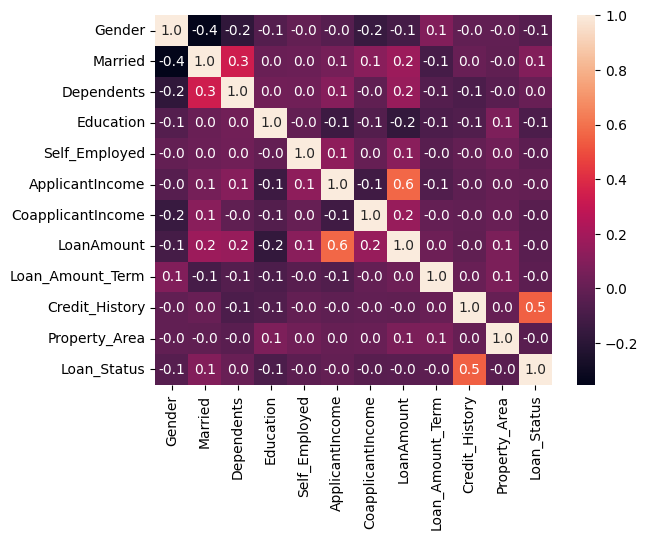

In [154]:
sns.heatmap(df_train.corr(), annot=True, fmt=".1f")
# no need to drop any columns.

<Axes: >

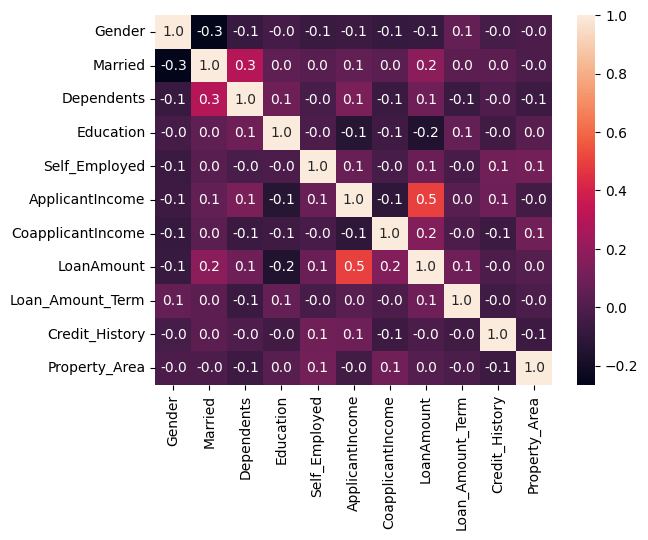

In [155]:
sns.heatmap(df_test.corr(), annot=True, fmt=".1f")
# no need to drop any columns.

In [156]:
def plot_box_for_df( datafrm, rows, cols ):     # function written to plot boxplots as subplots in a generic way.
  plot_position = 1     # variable introduced to make positioning of the plot easier.
  for col in datafrm.columns:
    plt.subplot( rows, cols, plot_position )
    datafrm[[col]].boxplot()
    plt.xticks(rotation=0)
    plt.title(col+' Box')
    plot_position += 1  # increments plot_position to fix the plot position

  plt.tight_layout()        # makes sure that the plots do not overlap each other.
  plt.show()

In [157]:
df_num_train = df_train[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
df_num_test = df_test[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]


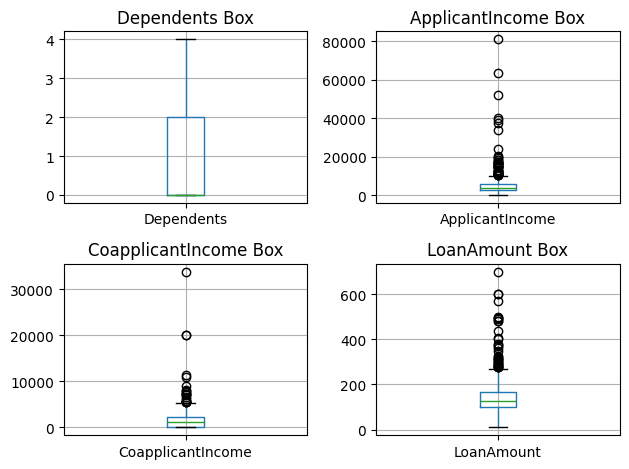

In [158]:
plot_box_for_df(df_num_train, 2, 2)
# since all the 3 values ('ApplicantIncome', 'CoapplicantIncome', 'LoanAmount') are highly significant,
# we are not clipping the outliers. so that, we get the proper relevance to the loan_status.

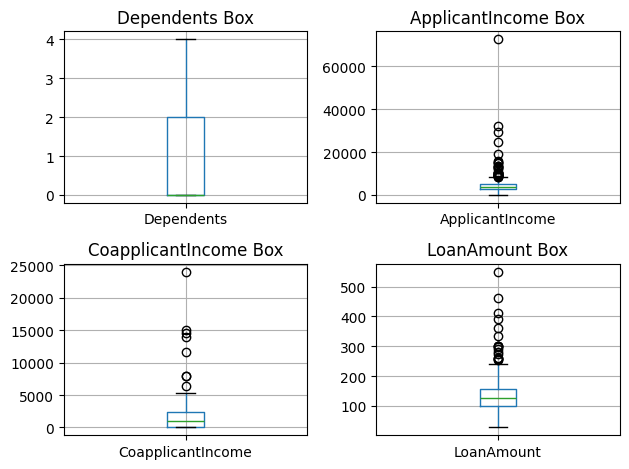

In [159]:
plot_box_for_df(df_num_test, 2, 2)
# since all the 3 values ('ApplicantIncome', 'CoapplicantIncome', 'LoanAmount') are highly significant,
# we are not clipping the outliers. so that, we get the proper relevance to the loan_status.

In [160]:
# Function to plot bar graphs in a subplot.
def plot_bar_for_df(datafrm, rows, cols, graph_type):
  plt.figure(figsize = (9,9))
  plot_position = 1     # variable introduced to make positioning of the plot easier.
  for col in datafrm.columns:
    plt.subplot(rows, cols, plot_position)
    datafrm[col].value_counts().sort_index().plot(kind=graph_type)  # here, sorting is done based on count.
    #datafrm[col].value_counts().plot(kind=graph_type)               # here, sorting is done based on value.
    plt.xticks(rotation=0)
    plt.title(col+' Distribution')
    plot_position += 1  # increments plot_position to fix the plot position

  plt.tight_layout()        # makes sure that the plots do not overlap each other.
  plt.show()

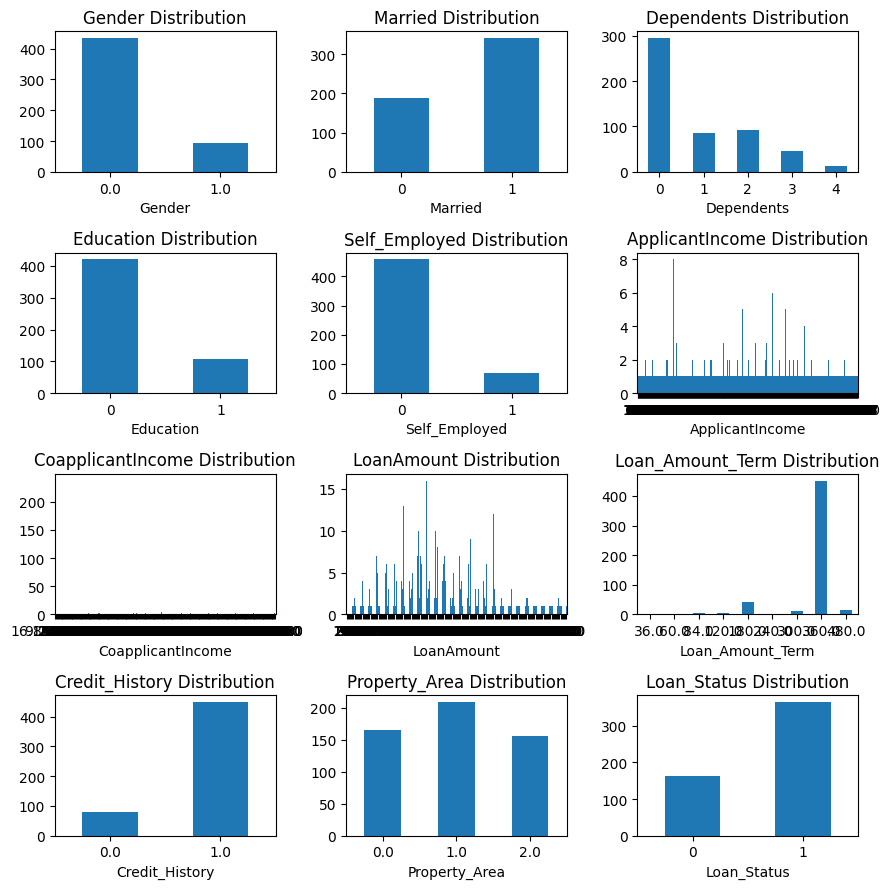

In [161]:
plot_bar_for_df(df_train, 4, 3, 'bar')

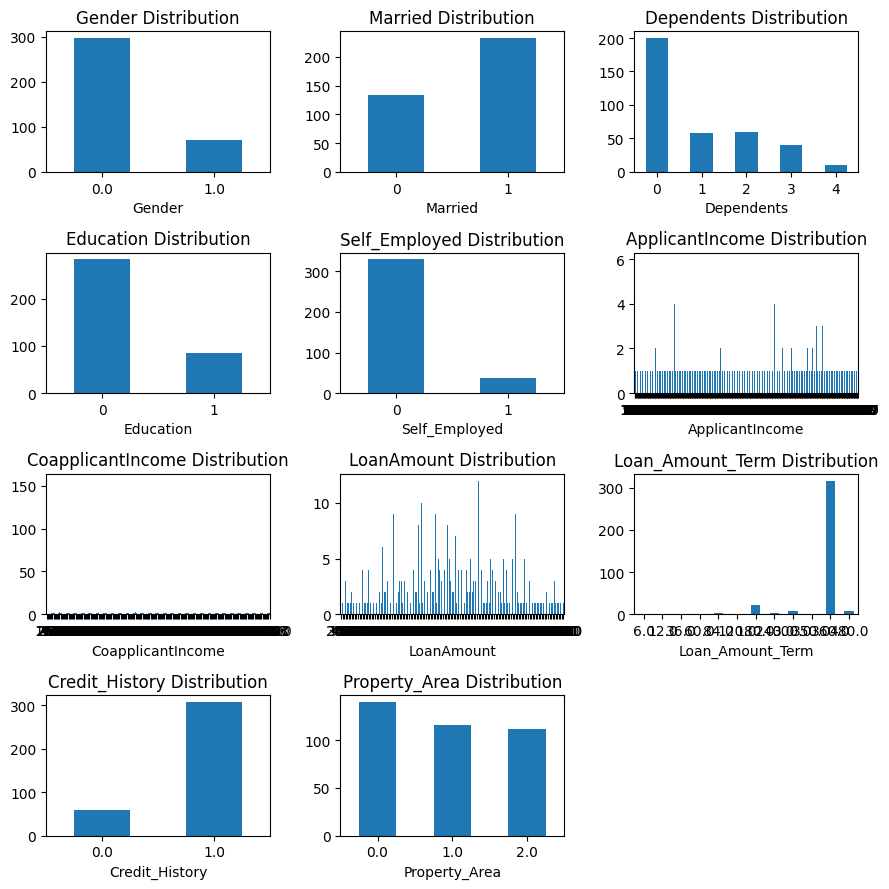

In [162]:
plot_bar_for_df(df_test, 4, 3, 'bar')

In [163]:
# applying min max scaler for 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'
# apply standardScaler for Loan_Amount_Term.

scaler = MinMaxScaler()
df_train[['ApplicantIncome', 'CoapplicantIncome']] = scaler.fit_transform(df_train[['ApplicantIncome', 'CoapplicantIncome']])
df_test[['ApplicantIncome', 'CoapplicantIncome']] = scaler.fit_transform(df_test[['ApplicantIncome', 'CoapplicantIncome']])

scaler = StandardScaler()

df_train[['LoanAmount']] = scaler.fit_transform(df_train[['LoanAmount']])
df_test[['LoanAmount']] = scaler.fit_transform(df_test[['LoanAmount']])

df_train[['Loan_Amount_Term']] = scaler.fit_transform(df_train[['Loan_Amount_Term']])
df_test[['Loan_Amount_Term']] = scaler.fit_transform(df_test[['Loan_Amount_Term']])

In [164]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1,1,0,0,0.054830,0.044567,-0.212457,0.27235,1.0,2.0,0
2,0.0,1,0,0,1,0.035250,0.000000,-0.950299,0.27235,1.0,0.0,1
3,0.0,1,0,1,0,0.030093,0.069687,-0.307663,0.27235,1.0,0.0,1
4,0.0,0,0,0,0,0.072356,0.000000,-0.057749,0.27235,1.0,0.0,1
5,0.0,1,2,0,1,0.065145,0.124006,1.441736,0.27235,1.0,0.0,1


In [165]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0,0,0,0.078865,0.000000,-0.431470,0.266022,1.0,0.0
1,0.0,1,1,0,0,0.042411,0.062500,-0.168629,0.266022,1.0,0.0
2,0.0,1,2,0,0,0.068938,0.075000,1.178429,0.266022,1.0,0.0
3,0.0,1,2,0,0,0.032263,0.106083,-0.595745,0.266022,1.0,0.0
4,0.0,0,0,1,0,0.045168,0.000000,-0.957151,0.266022,1.0,0.0


In [166]:
def remove_outliers_zscore(datafrm, col, threshold=2):
    # Check if the specified columns exist in the DataFrame
    if col not in datafrm.columns:
      raise ValueError(f"Column '{col}' not found in the DataFrame.")

    # Calculate the Z-scores for each column
    z_scores = np.abs(datafrm[col])

    # Identify rows where Z-score is less than the threshold for all columns
    #condition = (z_scores < threshold).all(axis=1)
    filtered_data = datafrm[z_scores < threshold] # if z_score < threshold, keep that row

    # Filter out rows where any column exceeds the Z-score threshold
    datafrm = filtered_data

    #return datafrm

In [167]:
df_train.shape

(529, 12)

In [168]:
remove_outliers_zscore(df_train, 'LoanAmount')
remove_outliers_zscore(df_train, 'Loan_Amount_Term')


In [169]:
df_train.shape

(529, 12)

In [170]:
df_train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1,1,0,0,0.054830,0.044567,-0.212457,0.27235,1.0,2.0,0
2,0.0,1,0,0,1,0.035250,0.000000,-0.950299,0.27235,1.0,0.0,1
3,0.0,1,0,1,0,0.030093,0.069687,-0.307663,0.27235,1.0,0.0,1
4,0.0,0,0,0,0,0.072356,0.000000,-0.057749,0.27235,1.0,0.0,1
5,0.0,1,2,0,1,0.065145,0.124006,1.441736,0.27235,1.0,0.0,1


In [171]:
df_train['Loan_Status'].value_counts()

,count
Loan_Status,
1,366
0,163


In [172]:
# there is a disparity in distribution of data in target column ( i.e., Loan_Status)
# to avoid data imbalance, we need to oversample the column data.

x= df_train.drop('Loan_Status', axis=1)
y= df_train['Loan_Status']

oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x, y)

balanced_df_test= pd.DataFrame(x_resampled, columns=x.columns)
balanced_df_test['Loan_Status'] = y_resampled

balanced_df_test['Loan_Status'].value_counts()

,count
Loan_Status,
0,366
1,366


# Model training

In [173]:
X_train = df_train.drop('Loan_Status', axis=1)
y_train = df_train['Loan_Status']

X_test = df_test

## PCA

In [174]:
from sklearn.decomposition import PCA
# doing dimensionality reduction to simplify the
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance=pca.explained_variance_ratio_
np.cumsum(explained_variance)


array([0.30048688, 0.52311535, 0.71589588, 0.84260815, 0.890232  ,
       0.92367332, 0.95004742, 0.97430707])

## KNN

In [175]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_KNN = knn.predict(X_test) # Predicted classification using knn.

## Logistic Regression

In [176]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_pred_LR = log_reg_model.predict(X_test) # Predicted classification using logistic regression.

## Naive Bayes

In [177]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred_NB = naive_bayes.predict(X_test)

## SVM

In [178]:
svm_clssfctn = SVC(kernel='linear')
svm_clssfctn.fit(X_train, y_train)

y_pred_SVM = svm_clssfctn.predict(X_test)

## Decision Tree

In [179]:
dcsn_tree = DecisionTreeClassifier()
dcsn_tree.fit(X_train, y_train)

y_pred_DT = dcsn_tree.predict(X_test)

## Random Forest

In [180]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_RF = random_forest.predict(X_test)

# Output file creation

In [181]:
def prep_output (X_test_loanID, y_pred, algo_type ):
  df_pred = pd.DataFrame(y_pred, columns = ['Loan_Status'])
  df_pred['Loan_Status'] = df_pred['Loan_Status'].replace({0: 'N', 1: 'Y'})

  df_op= pd.concat([X_test_loanID, df_pred], axis = 1, ignore_index=True)
  df_op.rename(columns={0: 'Loan_ID', 1: 'Loan_Status'}, inplace=True)
  file_path = algo_type + '_output.csv'
  df_op.to_csv(file_path, index=False)
  return df_op


In [182]:
# Displaying classification algorithm results.
df_op_LR = prep_output(df_test_loanID, y_pred_LR, 'Logistic_Regression')
df_op_KNN = prep_output(df_test_loanID, y_pred_KNN, 'KNN')
df_op_NB = prep_output(df_test_loanID, y_pred_NB, 'Naive_Bayes')
df_op_SVM = prep_output(df_test_loanID, y_pred_SVM, 'SVM')
df_op_DT = prep_output(df_test_loanID, y_pred_DT, 'Decision_Tree')
df_op_RF = prep_output(df_test_loanID, y_pred_RF, 'Random_Forest')

In [183]:
df_op_LR['Loan_Status'].value_counts()

,count
Loan_Status,
Y,308
N,59


In [184]:
df_op_KNN['Loan_Status'].value_counts()

,count
Loan_Status,
Y,278
N,89


In [185]:
df_op_NB['Loan_Status'].value_counts()

,count
Loan_Status,
Y,294
N,73


In [186]:
df_op_SVM['Loan_Status'].value_counts()

,count
Loan_Status,
Y,308
N,59


In [187]:
df_op_DT['Loan_Status'].value_counts()

,count
Loan_Status,
Y,231
N,136


In [188]:
df_op_RF['Loan_Status'].value_counts()

,count
Loan_Status,
Y,277
N,90


In [ ]:
filename = 'lr_loan_prediction.pkl'
with open(filename, 'wb') as file:
    pickle.dump(log_reg_model, file)